#Cargar las liberías y el csv, crear un dataframe de pandas a partir del csv

In [16]:
import pandas as pd
import numpy as np

In [17]:
eje1= 'eje1.csv'
df=pd.read_csv(eje1)
df

,ID,FP,EXPERIENCIA,ESTADOCIVIL,EDAD,AUTONOMO
0,1,informatica,2,soltero,20,si
1,2,papelaria,3,casado,32,no
2,3,informatica,4,separado,24,no
3,4,papelaria,2,soltero,43,si
4,5,administracion,2,separado,46,si
5,6,NaN,3,divorciado,54,no
6,7,papelaria,2,NaN,27,no
7,8,hosteleria,3,casado,42,si
8,9,informatica,2,separado,45,si
9,10,NaN,2,casado,61,si


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           20 non-null     int64 
 1   FP           17 non-null     object
 2   EXPERIENCIA  20 non-null     int64 
 3   ESTADOCIVIL  17 non-null     object
 4   EDAD         20 non-null     int64 
 5   AUTONOMO     20 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.1+ KB


#Pasar a categórica y a codes

In [19]:
df['FP']=pd.Categorical(df['FP'])
df['ESTADOCIVIL']=pd.Categorical(df['ESTADOCIVIL'])


In [20]:
df['FP']=df['FP'].cat.codes
df['ESTADOCIVIL']=df['ESTADOCIVIL'].cat.codes


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           20 non-null     int64 
 1   FP           20 non-null     int8  
 2   EXPERIENCIA  20 non-null     int64 
 3   ESTADOCIVIL  20 non-null     int8  
 4   EDAD         20 non-null     int64 
 5   AUTONOMO     20 non-null     object
dtypes: int64(3), int8(2), object(1)
memory usage: 808.0+ bytes


In [22]:
df

,ID,FP,EXPERIENCIA,ESTADOCIVIL,EDAD,AUTONOMO
0,1,2,2,3,20,si
1,2,3,3,0,32,no
2,3,2,4,2,24,no
3,4,3,2,3,43,si
4,5,0,2,2,46,si
5,6,-1,3,1,54,no
6,7,3,2,-1,27,no
7,8,1,3,0,42,si
8,9,2,2,2,45,si
9,10,-1,2,0,61,si


#Dummies para columnas booleanas

In [23]:
sexo_dummy= pd.get_dummies(df['AUTONOMO'], prefix="AUTONOMO")
df= pd.concat([df,sexo_dummy], axis=1)
df= df.drop(['AUTONOMO'], axis=1)

In [24]:
df

,ID,FP,EXPERIENCIA,ESTADOCIVIL,EDAD,AUTONOMO_no,AUTONOMO_si
0,1,2,2,3,20,0,1
1,2,3,3,0,32,1,0
2,3,2,4,2,24,1,0
3,4,3,2,3,43,0,1
4,5,0,2,2,46,0,1
5,6,-1,3,1,54,1,0
6,7,3,2,-1,27,1,0
7,8,1,3,0,42,0,1
8,9,2,2,2,45,0,1
9,10,-1,2,0,61,0,1


In [25]:
df.isna().sum()

ID             0
FP             0
EXPERIENCIA    0
ESTADOCIVIL    0
EDAD           0
AUTONOMO_no    0
AUTONOMO_si    0
dtype: int64

#histograma

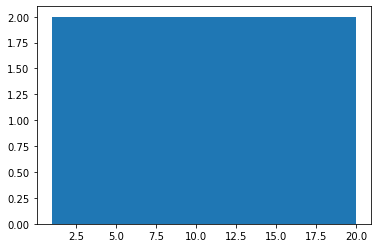

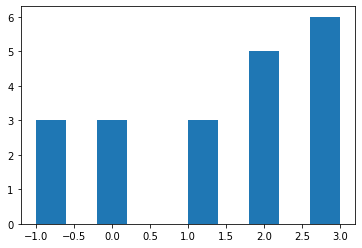

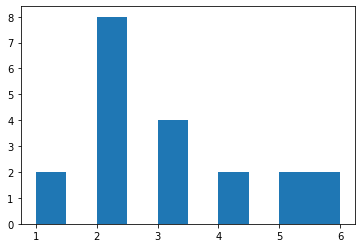

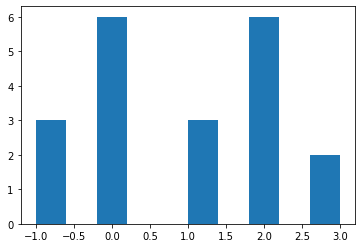

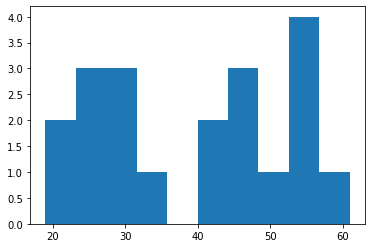

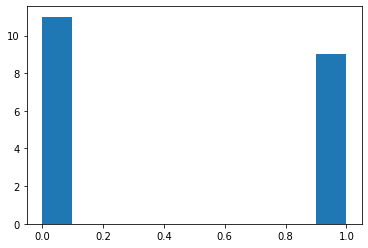

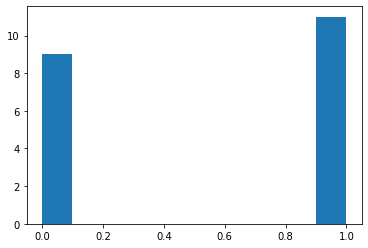

In [26]:

import seaborn as sns 
import matplotlib.pyplot as plt
for columna in df:
    plt.hist(df[columna])
    plt.show()

#Test de Shapiro

In [27]:
from scipy.stats import shapiro
for columna_numerica  in df.columns:
    stat, p = shapiro(df[columna_numerica])
    
    print('Valor de test=%.3f, p-value=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print('La variable ',columna_numerica, ' proviene de una distribución normal (no rechazamos H0) \n')
    else:
        print('La variable ',columna_numerica, ' NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 \n')

Valor de test=0.960, p-value=0.551
La variable  ID  proviene de una distribución normal (no rechazamos H0) 

Valor de test=0.868, p-value=0.011
La variable  FP  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.874, p-value=0.014
La variable  EXPERIENCIA  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.902, p-value=0.045
La variable  ESTADOCIVIL  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.922, p-value=0.109
La variable  EDAD  proviene de una distribución normal (no rechazamos H0) 

Valor de test=0.637, p-value=0.000
La variable  AUTONOMO_no  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.637, p-value=0.000
La variable  AUTONOMO_si  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 



#Normalizar

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



df = scaler.fit_transform(df)
df

array([[-1.64750894,  0.42008403, -0.67419986,  1.66540833, -1.46657355,
        -0.90453403,  0.90453403],
       [-1.47408695,  1.12022407,  0.        , -0.71374643, -0.55234588,
         1.1055416 , -1.1055416 ],
       [-1.30066495,  0.42008403,  0.67419986,  0.87235674, -1.161831  ,
         1.1055416 , -1.1055416 ],
       [-1.12724296,  1.12022407, -0.67419986,  1.66540833,  0.28569615,
        -0.90453403,  0.90453403],
       [-0.95382097, -0.98019606, -0.67419986,  0.87235674,  0.51425306,
        -0.90453403,  0.90453403],
       [-0.78039897, -1.6803361 ,  0.        ,  0.07930516,  1.12373818,
         1.1055416 , -1.1055416 ],
       [-0.60697698,  1.12022407, -0.67419986, -1.50679801, -0.93327408,
         1.1055416 , -1.1055416 ],
       [-0.43355498, -0.28005602,  0.        , -0.71374643,  0.20951051,
        -0.90453403,  0.90453403],
       [-0.26013299,  0.42008403, -0.67419986,  0.87235674,  0.43806743,
        -0.90453403,  0.90453403],
       [-0.086711  , -1.6803

#crear una columna objetivo

In [31]:
''' X=df.drop('EDAD', axis=1)
Y=df['EDAD'] '''

AttributeError: ignored

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [16]:
modelo = linear_model.LinearRegression()

In [17]:
df

array([[-1.64750894,  0.42008403, -0.67419986,  1.66540833, -1.46657355,
        -0.90453403,  0.90453403],
       [-1.47408695,  1.12022407,  0.        , -0.71374643, -0.55234588,
         1.1055416 , -1.1055416 ],
       [-1.30066495,  0.42008403,  0.67419986,  0.87235674, -1.161831  ,
         1.1055416 , -1.1055416 ],
       [-1.12724296,  1.12022407, -0.67419986,  1.66540833,  0.28569615,
        -0.90453403,  0.90453403],
       [-0.95382097, -0.98019606, -0.67419986,  0.87235674,  0.51425306,
        -0.90453403,  0.90453403],
       [-0.78039897, -1.6803361 ,  0.        ,  0.07930516,  1.12373818,
         1.1055416 , -1.1055416 ],
       [-0.60697698,  1.12022407, -0.67419986, -1.50679801, -0.93327408,
         1.1055416 , -1.1055416 ],
       [-0.43355498, -0.28005602,  0.        , -0.71374643,  0.20951051,
        -0.90453403,  0.90453403],
       [-0.26013299,  0.42008403, -0.67419986,  0.87235674,  0.43806743,
        -0.90453403,  0.90453403],
       [-0.086711  , -1.6803

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
train,test=train_test_split(df,random_state=10, train_size=0.75)